In [97]:
def read_file(filename):
    with open(filename, "r") as file:
        content = file.read()
    return content.split("\n\n") 

sample_data = read_file("sample_data.txt")

In [98]:
sample_data

['An atlas of small non-coding RNAs in Human Preimplantation Development (Mouse embryo RNA-seq)\nOur current understanding of the molecular circuitries that govern early embryogenesis remains limited, particularly in the human. Small non-coding RNAs (sncRNAs) regulate gene expression transcriptionally and post-transcriptionally, however, the expression of specific biotypes and their dynamics during preimplantation development remains to be determined. Using Small-seq, we identified the abundance of and dynamic expression of piRNA, rRNA, snoRNA, tRNA, and miRNA in human embryos from day 3 to 7. Among the biotypes, both miRNA and snoRNA displayed distinct associations with developmental time and lineage formation, many of which were  found to target key gene expression programs in pluripotency and lineage establishment. We observed an enrichment of the chromosome 19 miRNA cluster (C19MC) in the trophectoderm (TE), and the chromosome 14 miRNA cluster (C14MC) and MEG8-related snoRNAs in th

In [99]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import TruncatedSVD 

In [100]:
vectorizer = TfidfVectorizer(stop_words='english')
vectorizer.fit(sample_data)
data_matrix = vectorizer.transform(sample_data)

In [102]:
dense_data_matrix = []
number_of_empty = 0
for array in data_matrix.toarray():
    x = sum(array)
    if x == 0:
        print('found')
        number_of_empty += 1
    else:
        dense_data_matrix.append(array)


found
found


In [108]:
agg = AgglomerativeClustering(metric='cosine',linkage='average',n_clusters=None,distance_threshold=0.5)
agg_labels = agg.fit_predict(dense_data_matrix)

In [104]:
svd = TruncatedSVD(n_components=3)
svd_data = svd.fit_transform(dense_data_matrix)

In [79]:
from sklearn.manifold import TSNE

In [80]:
tsne = TSNE(n_components=3,metric='cosine')

data_draw = tsne.fit_transform(svd_data)

In [53]:
data_draw

array([[ -59.844086  ,  -44.305706  ,    8.938976  ],
       [ -94.99213   ,   31.330156  ,    9.770752  ],
       [   9.244848  ,   57.231922  ,   -8.299613  ],
       [  59.06145   ,  -18.150549  ,    0.6691764 ],
       [  67.60277   ,  -19.492691  ,  -36.138973  ],
       [  46.73085   ,    5.5702085 ,  -21.921488  ],
       [ -37.139652  ,    3.9162846 ,   47.770367  ],
       [ -58.93728   ,  -58.794758  ,   -6.0804114 ],
       [ -70.55112   ,  -41.301098  ,   -8.844691  ],
       [  32.59424   ,   64.63801   ,  -34.819824  ],
       [   6.795032  ,    8.445219  ,  -82.91861   ],
       [ -20.55015   ,   71.49953   ,  -52.51983   ],
       [  46.90153   ,  -50.693447  ,   39.899387  ],
       [ -20.55015   ,   71.49953   ,  -52.51983   ],
       [   1.4310218 ,  -73.276955  ,  -47.279373  ],
       [  53.72481   ,  -46.772137  ,   21.995863  ],
       [  68.18146   ,   52.768745  ,   30.923252  ],
       [  69.10168   ,   34.48136   ,   31.62655   ],
       [  31.475632  ,   82.

In [58]:
from sklearn.decomposition import PCA


In [83]:
pca = PCA(n_components=3)
pca_data = pca.fit_transform(dense_data_matrix)

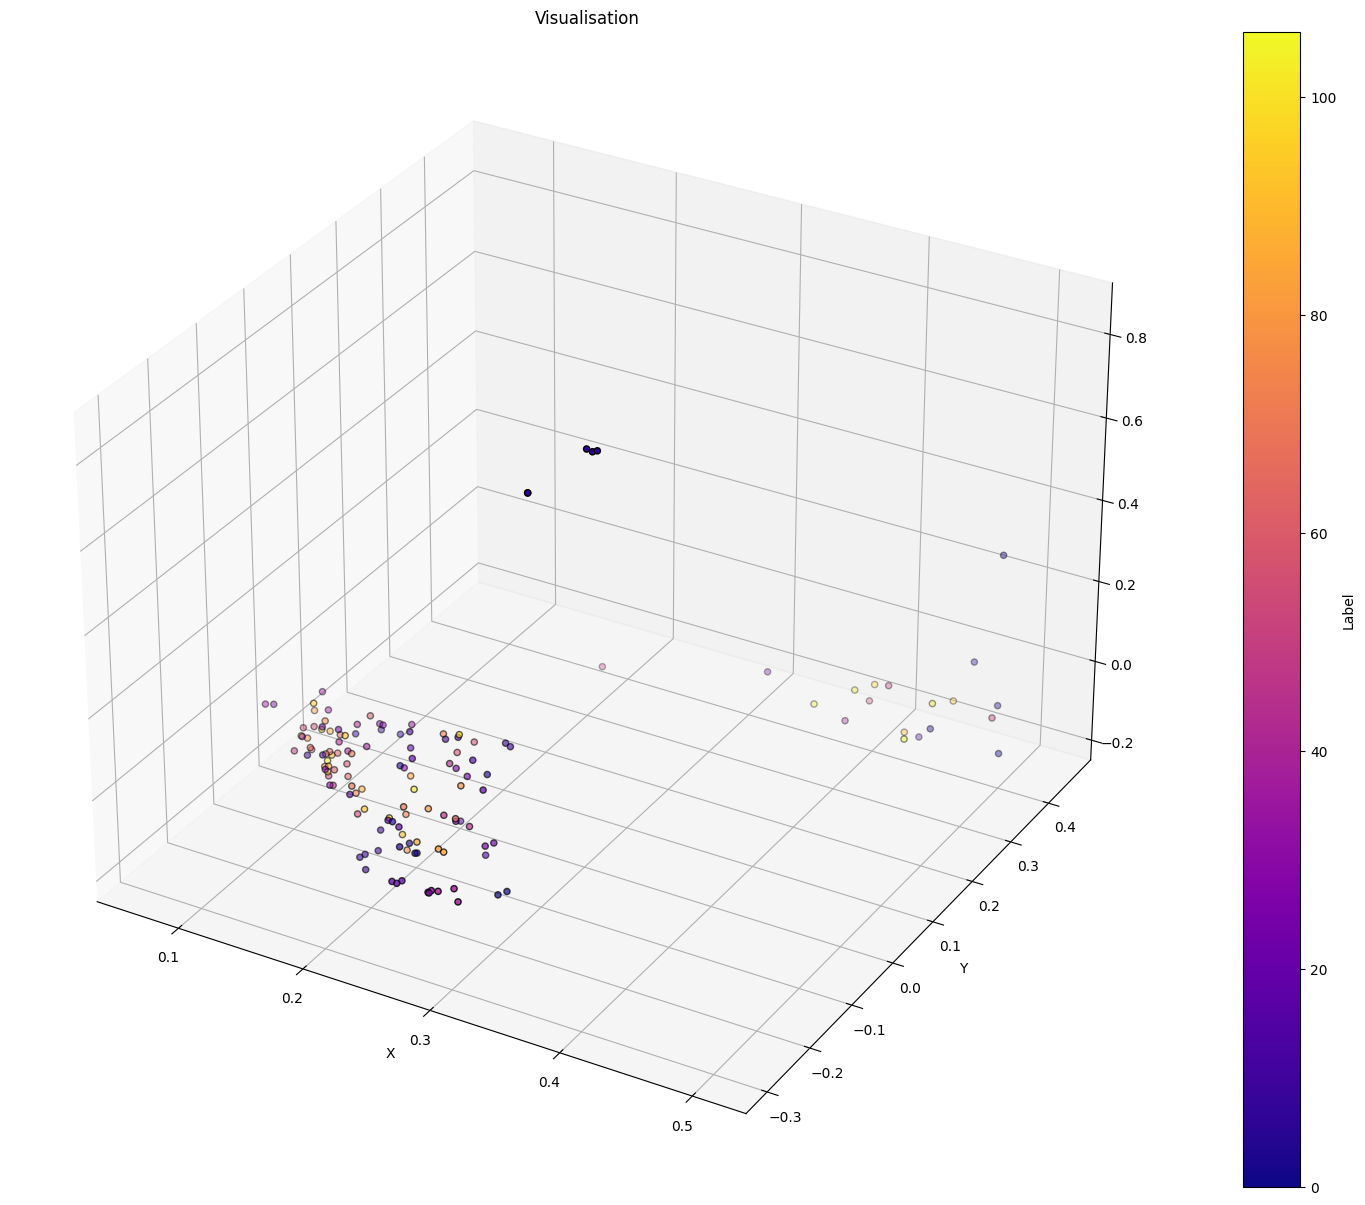

In [109]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


x = svd_data[:,0]
y = svd_data[:,1]
z = svd_data[:,2]
labels = agg_labels

fig = plt.figure(figsize=(20, 15))
ax = fig.add_subplot(111, projection="3d")


sc = ax.scatter(x, y, z, c=labels,cmap="plasma", edgecolors="k")


plt.colorbar(sc,label="Label")

plt.xlabel("X")
plt.ylabel("Y")
plt.title("Visualisation")
plt.show()
